In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Read csv data and visualization**

In [2]:
# read csv data and visulization
data = pd.read_csv("hungary_chickenpox.csv")
dataFrame = pd.DataFrame(data, columns=["Date", "BUDAPEST", "BARANYA", "BACS"])

In [3]:
date_ = dataFrame.Date
Budapest = dataFrame.BUDAPEST
Baranya = dataFrame.BARANYA
Bacs = dataFrame.BACS

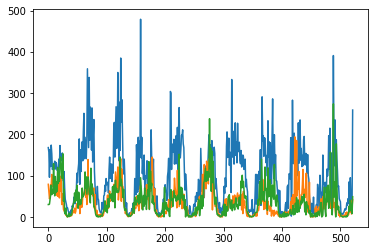

In [4]:
plt.plot(Budapest)
plt.plot(Baranya)
plt.plot(Bacs)
plt.show()

In [5]:
print(data.shape)
print(data.iloc[:, 1:20])

(522, 21)
     BUDAPEST  BARANYA  BACS  BEKES  ...  SZABOLCS  TOLNA  VAS  VESZPREM
0         168       79    30    173  ...        64     11   29        87
1         157       60    30     92  ...        29     58   53        68
2          96       44    31     86  ...        33     24   18        62
3         163       49    43    126  ...        50     25   21        43
4         122       78    53     87  ...        56      7   47        85
..        ...      ...   ...    ...  ...       ...    ...  ...       ...
517        95       12    41      6  ...        23      4   11       110
518        43       39    31     10  ...         5     23   22        63
519        35        7    15      0  ...        21     14    0        17
520        30       23     8      0  ...        17      1    1        83
521       259       42    49     32  ...        39     27   11       103

[522 rows x 19 columns]


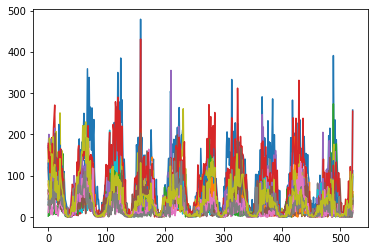

In [6]:
# plot all dataset
plt.plot(data.iloc[:, 1:20])
plt.show()

**Init kmeans and fit data**

In [7]:
# import kmeans
from sklearn.cluster import KMeans

In [8]:
# init kmeans parameter and fit data
kmeans = KMeans(n_clusters=4, random_state=1)
pred_y = kmeans.fit(data.iloc[:, 1:20])


**check predicted labels and visualize the results**

In [9]:
# read predicted labels
labels = pred_y.labels_
print(labels)

[2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 0 1 3 3 3 3 3 3 3 3 3
 3 3 3 3 1 1 1 1 1 3 1 1 0 1 0 0 0 1 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2
 0 0 0 0 0 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 0 2 0 0 2 0 0
 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 0 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 1 1 1 0 1 1 0 1 0 2 2 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 2 0 0 0 1 1 1 1 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 1 1 1 0 3 1 2 2 1 0 0 0 0 2 0 2 0 0 2
 0 2 2 0 0 2 0 0 0 0 0 0 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1
 3 1 0 1 1 1 1 1 0 0 1 0 0 2 0 0 2 2 0 2 0 2 0 2 0 0 2 1 1 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 3 1 0 1 1 0 0 1 1 1 2 0 0 0 0 0 2 0 2 0 2 2 2 2 0 0 2 2 0
 2 0 0 1 0 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 1 1 0 1 0 2 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 1 3 1 1 1 0 3 1 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 1 1 1 3 3 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 3 3 0 2 0 0 0 1 

In [10]:
# add 'label' column to dataframe for visualization
data['label'] = labels

In [11]:
# add index column
index = data.index
print(index)
index_arr = []
for i in index:
  index_arr.append(i)
data['index_value'] = index_arr

RangeIndex(start=0, stop=522, step=1)


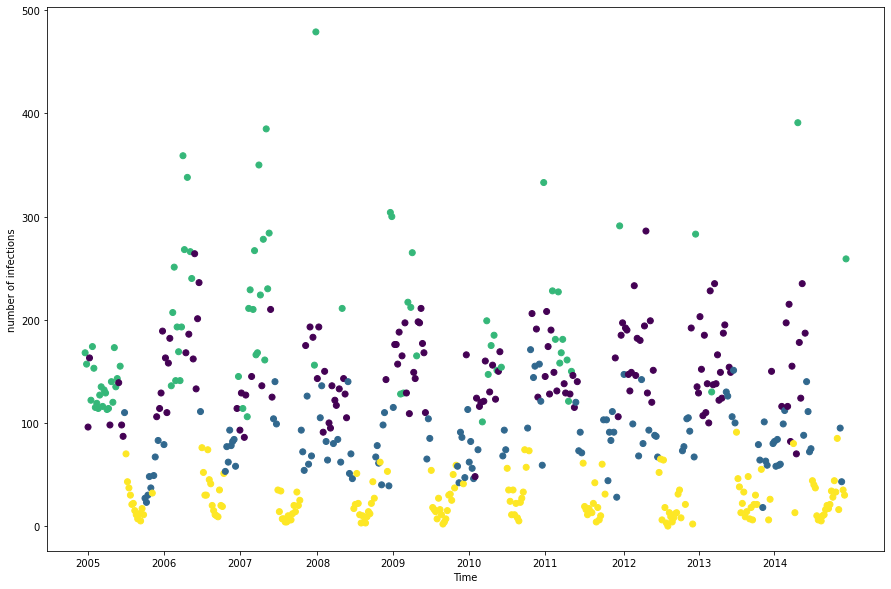

In [12]:
# add labels for x axis
fig, ax = plt.subplots(figsize = (15, 10))
x_label = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']

def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([2, 54, 106, 159, 211, 263,315,369,420,472])
    ax.set_xticklabels(labels)

# plot data with color label
for i in np.arange(1, 2, 1):
  plt.scatter(x=data.index, y=data.iloc[:,i:i+1], c = data['label'])
  set_axis_style(ax, x_label)
plt.xlabel("Time")
plt.ylabel("number of infections")
plt.show()

**Additional: apply PCA for a better visualization**

In [13]:
# additional: used PCA to reduce dimension => better visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca_2 = PCA(2)


In [14]:
# Turn the vote data into two columns with PCA
plot_columns = pca_2.fit_transform(data.iloc[:,1:20])

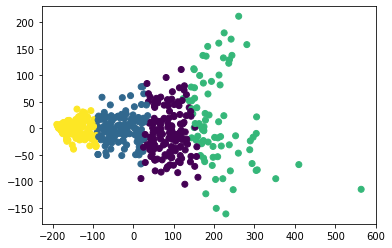

In [15]:
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c = data['label'])
plt.show()